# Libraries

In [3]:
#Libraries
import gymnasium as gym
from tetris_gymnasium.envs.tetris import Tetris
from tetris_gymnasium.envs.tetris import TetrisState
from tetris_gymnasium.wrappers.observation import FeatureVectorObservation

import sys
import cv2
import time
import numpy as np

import os

import neat
import random
import pickle

# Load Winning Neural Network

In [4]:
# Load the object from the file
import pickle
# Load the object from the file

with open('my_winner_delh_only.pkl', 'rb') as f:
     x_net_delh_only= pickle.load(f)
with open('my_winner.pkl', 'rb') as f:
     x_net_del_h_andholes = pickle.load(f)
print(x_net_del_h_andholes)
print(x_net_delh_only)

# Have neural network play Random Games of Tetris and Output resulting number of blocks and holes at end of game

In [5]:
def eval_nn():
    if __name__ == "__main__":
        # Create an instance of Tetris
        env = gym.make("tetris_gymnasium/Tetris", render_mode="ansi")
        env.reset() ########CHANGE SEED
        
        reward_hist = 0

        # Main game loop
        terminated = False
        while not terminated:
            env.render()


            env1 = FeatureVectorObservation(env) #create an instance of the class

            height_i = env1.calc_height(env.board) #call a function from the class with the board as an input
            height_i = (height_i[4:14])-4 #crop out the padding on either side (the bedrock) and normalize by the 4 layers of bedrock underneath
            prev_height = height_i

            ### Code to get the holes after each frame
            holes_i = env1.calc_holes(env.board)
            prev_holes = holes_i


            ### Get the current tetromino in a list form and in the position relative to the other blocks
            tetromino = env.active_tetromino
            slices = env.get_tetromino_slices(tetromino, env.x, env.y)
            #Create pseudo_board of just zeros
            only_tetromino = np.zeros((24,18))
            #add the tetromino in its correct place
            only_tetromino[slices] += tetromino.matrix
            #Convert to 1s and 0s
            only_tetromino = np.where(only_tetromino > 0, 1, 0)
            #Sum in each column
            only_tetromino = np.sum(only_tetromino,axis=0)
            #Crop out the empty bedrock
            only_tetromino=only_tetromino[4:14]
            #print(only_tetromino)

            #compile the two features together
            i_feat = np.hstack((only_tetromino,height_i)) #this is a one dimensional list of 20 integers

            #Iterate to the next step
            action = np.argmax(x_net_del_h_andholes.activate(i_feat)) ### CHANGE WITH NETWORK PLAYING WITH
            if action ==2:
                action = 5

            observation, reward, terminated, truncated, info = env.step(action)
            reward_hist +=reward

            env1 = FeatureVectorObservation(env)
            holes_i = env1.calc_holes(env.board)


    return reward_hist , holes_i

# Evaluate NN by playing 3000 games of Tetris

In [7]:
#Call the random agent 3000 times and log the rewards and holes
import matplotlib.pyplot as plt
num_iter = 3000

reward_list = np.zeros(num_iter)
holes_list = np.zeros(num_iter)

for i in range(num_iter):
    ix_reward , ix_holes = eval_nn()
    reward_list[i] = ix_reward
    holes_list[i] = ix_holes

C:\Users\Evan Wood\Downloads\anaconda\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (24, 18)
  logger.warn(
C:\Users\Evan Wood\Downloads\anaconda\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (4, 4)
  logger.warn(
C:\Users\Evan Wood\Downloads\anaconda\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to ha

# Visualize Results for 1st NEAT Implementation

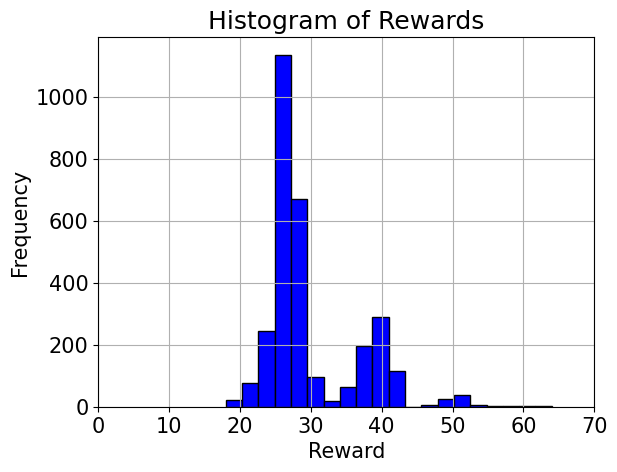

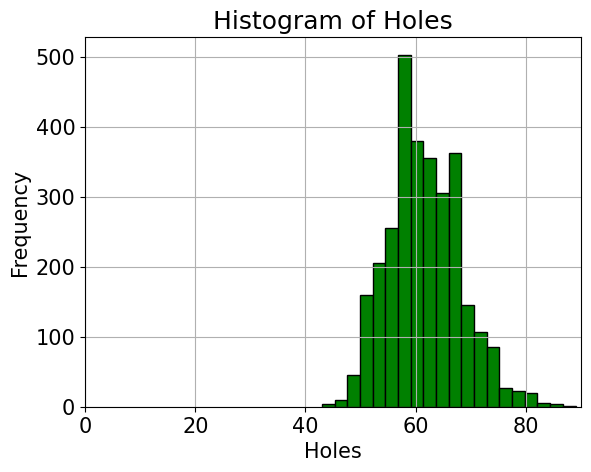

In [19]:
    # Plot the histogram for reward_list
# Create a figure for the first histogram
plt.hist(reward_list, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of Rewards")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.xlim(0,70)
plt.rc('font',size=15)
plt.grid(True)
plt.show()

# Plot the histogram for holes_list
# Create a figure for the second histogram
plt.hist(holes_list, bins=20, color='green', edgecolor='black')
plt.title("Histogram of Holes")
plt.xlabel("Holes")
plt.ylabel("Frequency")
plt.rc('font',size=15)
plt.xlim(0,90)
plt.grid(True)
plt.show()

# Evaluate and Visualize Results from 2nd Neat Implementation

In [16]:
#Call the random agent 3000 times and log the rewards and holes
import matplotlib.pyplot as plt
num_iter = 3000

reward_list_new = np.zeros(num_iter)
holes_list_new = np.zeros(num_iter)

for i in range(num_iter):
    ix_reward , ix_holes = eval_nn()
    reward_list_new[i] = ix_reward
    holes_list_new[i] = ix_holes

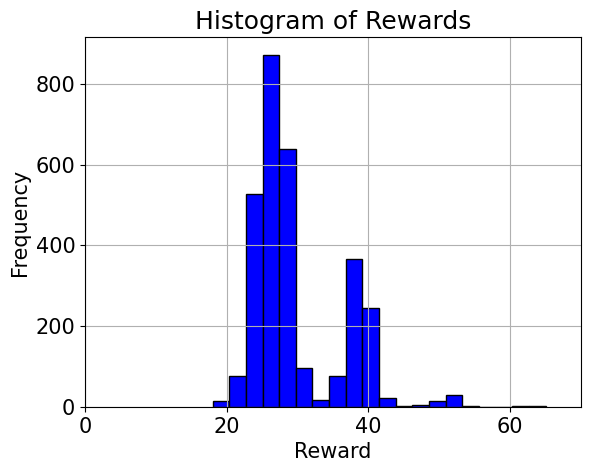

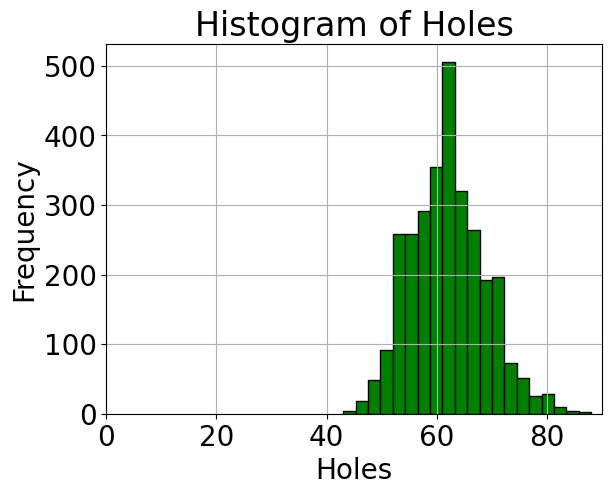

In [20]:
    # Plot the histogram for reward_list
# Create a figure for the first histogram
plt.hist(reward_list_new, bins=20, color='blue', edgecolor='black')
plt.title("Histogram of Rewards")
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.xlim(0,70)
plt.rc('font',size=20)
plt.grid(True)
plt.show()

# Plot the histogram for holes_list
# Create a figure for the second histogram
plt.hist(holes_list_new, bins=20, color='green', edgecolor='black')
plt.title("Histogram of Holes")
plt.xlabel("Holes")
plt.ylabel("Frequency")
plt.xlim(0,90)
plt.grid(True)
plt.show()